In [106]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

<div style="text-align: center;">
    <h1 style="color: green; font-size: 25px; font-family: 'Canva Sans';">
        EDA Project
    </h1>
    <h2 style="color: green; font-size: 25px; font-family: 'Canva Sans';">
        SCHOOL STUDENTS EXAM PERFORMANCE FACTORS
    </h2>
</div>


link to the dataset https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?resource=download

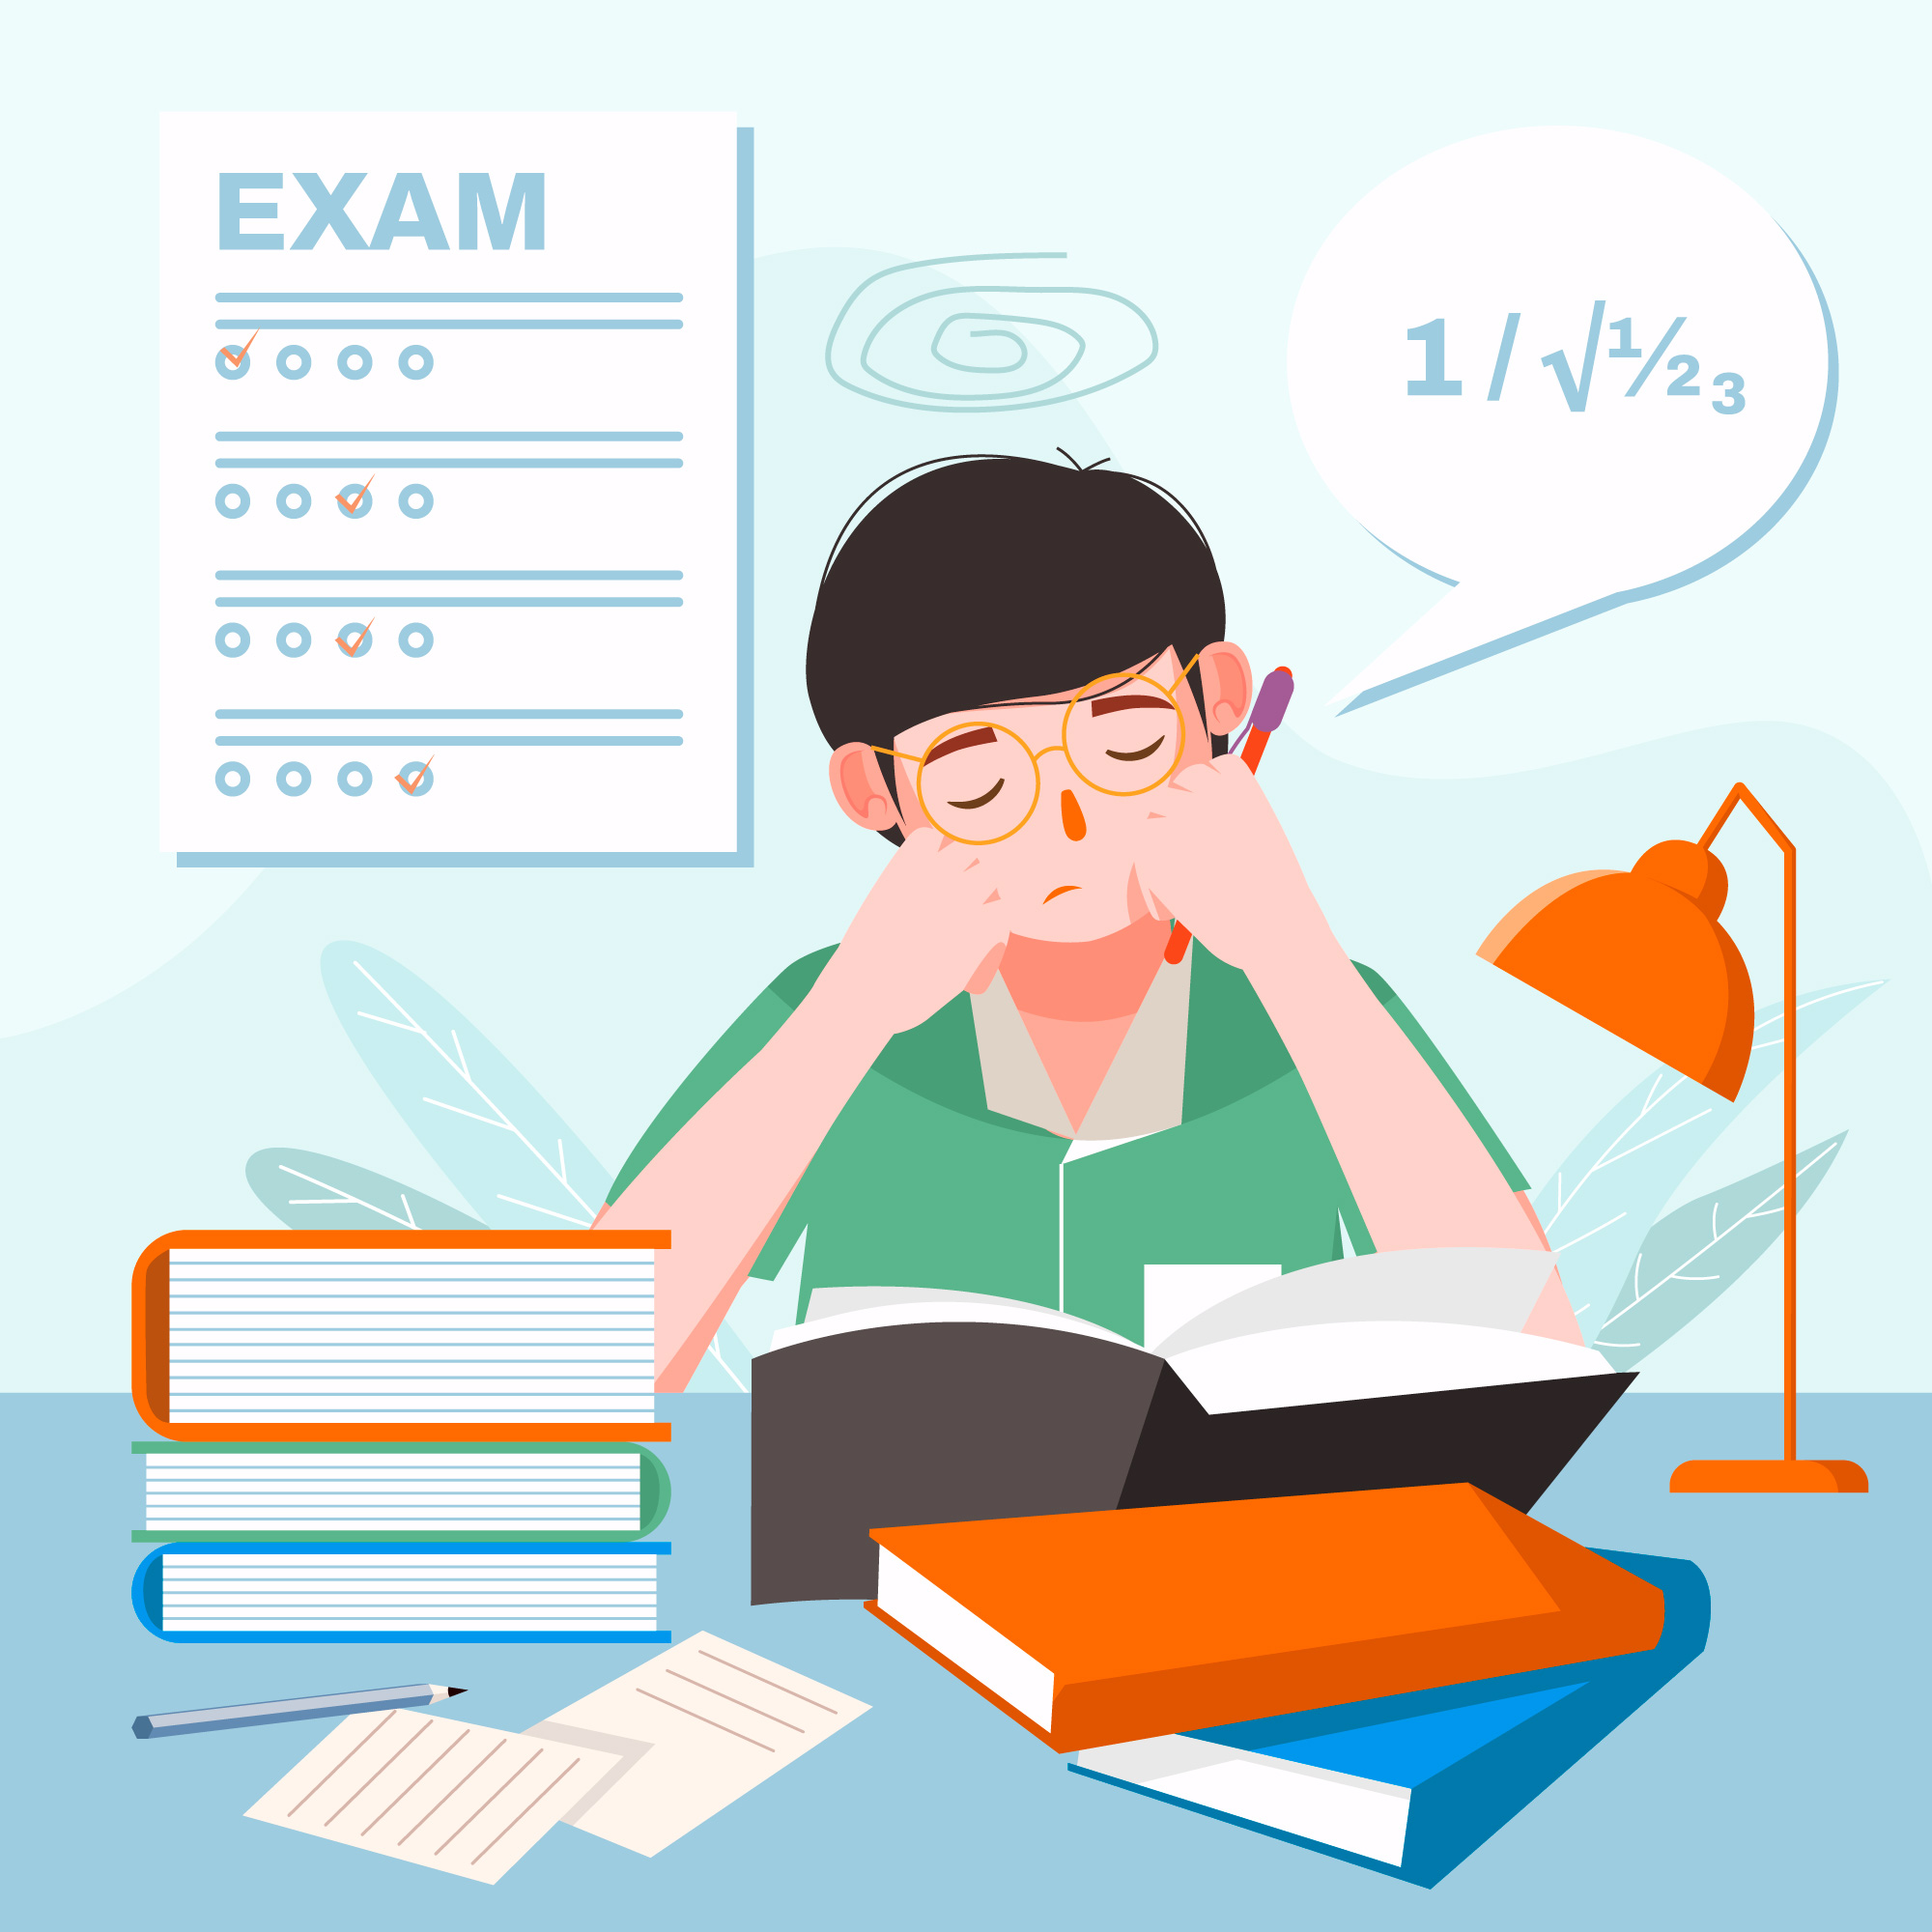

In [172]:
from IPython.display import Image, display
display(Image(filename='/Users/anastasiasadova/Desktop/8994551.jpg', width=500))

**Hours_Studied**: Number of hours spent studying per week.  

**Attendance**: Percentage of classes attended.  

**Parental_Involvement**: Level of parental involvement in the student's education (Low, Medium, High).  

**Access_to_Resources**: Availability of educational resources (Low, Medium, High).  

**Extracurricular_Activities**: Participation in extracurricular activities (Yes, No).  

**Sleep_Hours**: Average number of hours of sleep per night.  

**Previous_Scores**: Scores from previous exams.  

**Motivation_Level**: Student's level of motivation (Low, Medium, High).  

**Internet_Access**: Availability of internet access (Yes, No).  

**Tutoring_Sessions**: Number of tutoring sessions attended per month.  

**Family_Income**: Family income level (Low, Medium, High).  

**Teacher_Quality**: Quality of the teachers (Low, Medium, High).  

**School_Type**: Type of school attended (Public, Private).  

**Peer_Influence**: Influence of peers on academic performance (Positive, Neutral, Negative).  

**Physical_Activity**: Average number of hours of physical activity per week.  

**Learning_Disabilities**: Presence of learning disabilities (Yes, No).  

**Parental_Education_Level**: Highest education level of parents (High School, College, Postgraduate).  

**Distance_from_Home**: Distance from home to school (Near, Moderate, Far).  

**Gender**: Gender of the student (Male, Female).  

**Exam_Score**: Final exam score.  

## <span style="color: green;"> Questions I would like to investigate in my EDA</span>

Which factors have the greatest impact on exam scores?

Are there common factors that distinguish higher-performing students from lower-performing ones?

Are there any factors that parents consider important but are, in fact, completely irrelevant?


### To answer these questions, I will create several graphs that address each question in detail.

How does Parental_Involvement correlate with Exam_Score?

Is there a difference in Exam_Score based on Parental_Education_Level?


How does Peer_Influence affect student performance?

How strongly does Attendance and better Previous_Scores correlate with Exam_Score?

How do multiple factors (like Hours_Studied, Parental_Involvement, and Teacher_Quality) together influence exam performance?

In [108]:
data_before_cleaning = pd.read_csv('/Users/anastasiasadova/Desktop/StudentPerformanceFactors_CleanMessy (1).csv')

In [109]:
data_before_cleaning.head()

,Hours Studied,Attendance,PARENTAL INVOLVEMENT,Access to Resources,Extracurricular Activities,SLEEP HOURS,Previous Scores,Motivation Level,INTERNET ACCESS,Tutoring Sessions,Family Income,Teacher Quality,School Type,Peer Influence,Physical Activity,Learning Disabilities,Parental Education Level,Distance from Home,Gender,Exam Score
0,23.0H,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,Low,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,19.0H,64.0,Low,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0
2,24.0H,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,74.0
3,29.0H,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0
4,19.0H,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,High,Public,Neutral,4.0,No,College,Near,Female,70.0


## <span style="color: green;"> Data preprocessing </span>

It will include getting rid of emplty raws, renaming some columns changing space to _ for column names to be usable and changing data types in some columns as well.

there are rows that are completely empty  
#### empty_row_count = df.isnull().all(axis=1).sum()

so I deleted them 
#### data.dropna(how='all', inplace=True)

checked data shape 
#### data.shape 

#### data.isnull().sum() 
there are some rows with NaN values but I have decided to keep them because there were 235 rows and its a segnificant amount. NaN were in 3 columns (Teacher_Quality, Parental_Education_Level, Distance_from_Home)

checked if there are any duplicates 
#### data.pulicates() then **data.drop_duplicates(inplace=True) 

made sure that all indexes are in order 
#### data.reset_index(drop=True, inplace=True) 

checked all data types of they are usable 
#### data.dtypes

columns were not iqualy sighed and had spaces 
#### data.columns = [col.title().replace(' ', '_') for col in data.columns] 

column had an oblect type and contained letter H in values. 
#### data['Hours_studied'] = data['Hours_studied'].str.replace('H', '', regex=False).astype(float) 

It was more convinient to save all changes to a new csv file
#### data.to_csv("StudentPerformanceFactors.csv", index=False)

In [137]:
data = pd.read_csv("/Users/anastasiasadova/Desktop/StudentPerformanceFactors.csv")

In [138]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [139]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [140]:
data['Exam_Score'].describe()

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

Text(0, 0.5, 'Exam_Score')

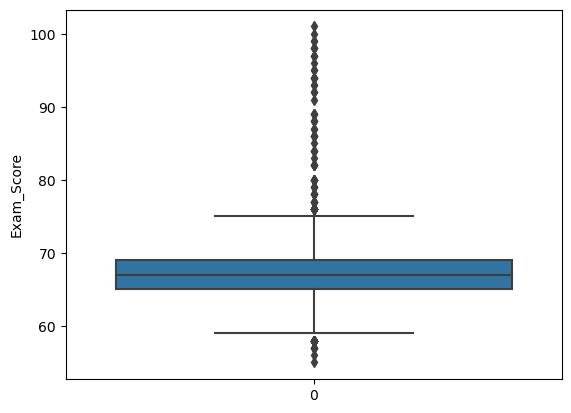

In [115]:
sns.boxplot(data=data["Exam_Score"])
plt.ylabel("Exam_Score")

After plotting the exam scores, I observed a few notable outliers. Most scores clustered within the middle range, which is typical in many educational datasets. However, these outliers stood apart, suggesting that certain students performed exceptionally high or low compared to the rest. Curious about these differences, I decided to analyze the outliers first to identify any underlying factors that might contribute to their unique performance patterns. 

In [116]:
Q1 = data['Exam_Score'].quantile(0.25)
Q3 = data['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_point = Q1 - 1.5 * IQR
upper_point = Q3 + 1.5 * IQR

# Identify rows with outliers
outliers = data[(data['Exam_Score'] < lower_point) | (data['Exam_Score'] > upper_point)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 104


In [117]:
data['Highest_Grade'] = data['Exam_Score'] > upper_point
data['Lowest_Grade'] = data['Exam_Score'] < lower_point

In [118]:
Highest_Grade =  data[data['Highest_Grade']]

<Figure size 1600x600 with 0 Axes>

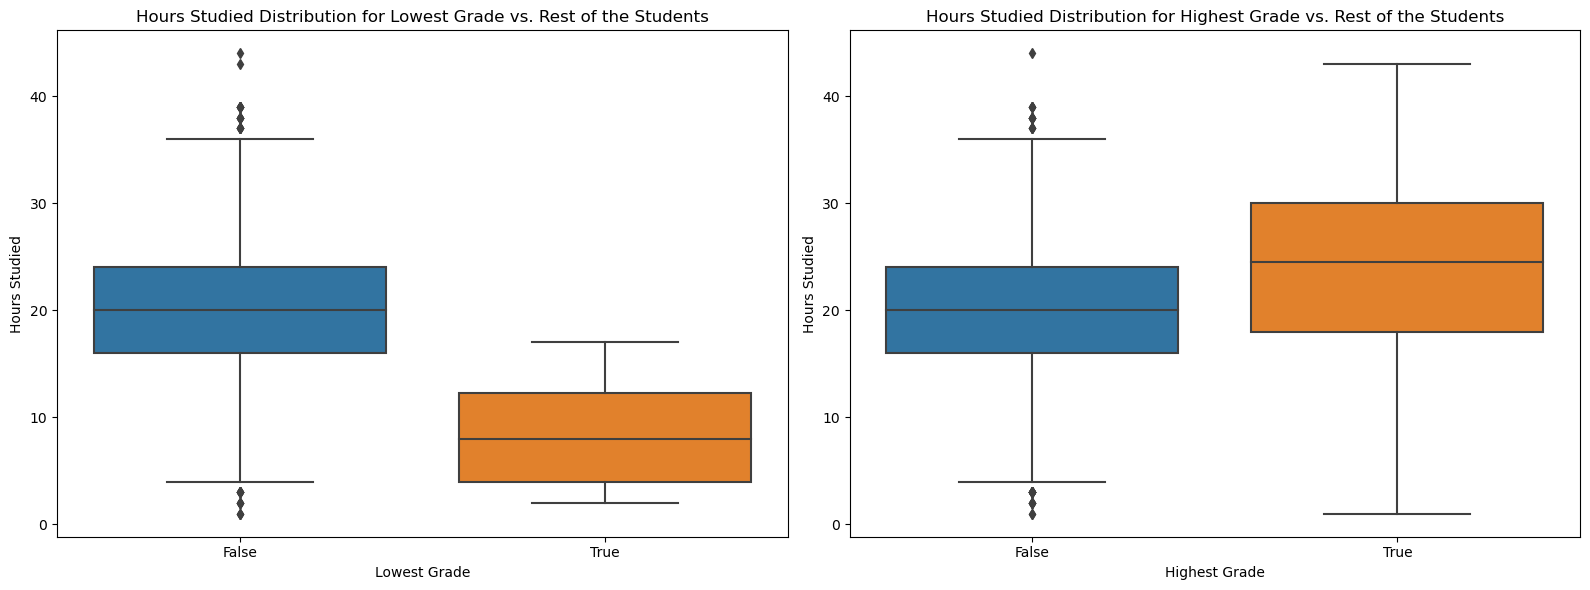

In [119]:
plt.figure(figsize=(16, 6))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for Lowest Grade vs. Rest of the Students
sns.boxplot(data=data, x='Lowest_Grade', y='Hours_Studied', ax=axes[0])
axes[0].set_title("Hours Studied Distribution for Lowest Grade vs. Rest of the Students")
axes[0].set_xlabel("Lowest Grade")
axes[0].set_ylabel("Hours Studied")

# Boxplot for Highest Grade vs. Rest of the Students
sns.boxplot(data=data, x='Highest_Grade', y='Hours_Studied', ax=axes[1])
axes[1].set_title("Hours Studied Distribution for Highest Grade vs. Rest of the Students")
axes[1].set_xlabel("Highest Grade")
axes[1].set_ylabel("Hours Studied")

plt.tight_layout()
plt.show()

From the boxplots above, it’s clear that the time spent studying had a noticeable impact on the final scores, which aligns with our expectations. Generally, it makes sense that the more hours a student dedicates to studying, the better prepared they are likely to be, leading to higher scores. The data appears to reinforce this, showing a positive relationship between study hours and performance.

<Figure size 1600x600 with 0 Axes>

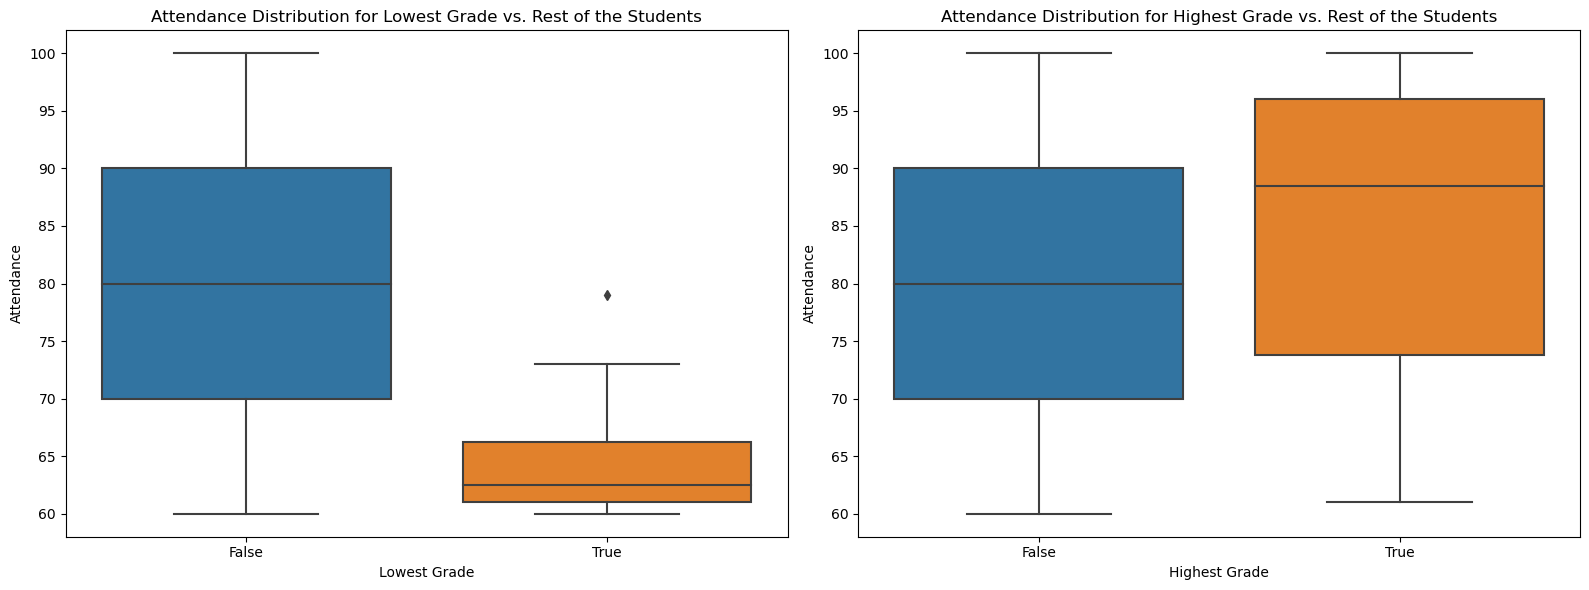

In [120]:
plt.figure(figsize=(16, 6))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for Lowest Grade vs. Rest of the Students
sns.boxplot(data=data, x='Lowest_Grade', y='Attendance', ax=axes[0])
axes[0].set_title("Attendance Distribution for Lowest Grade vs. Rest of the Students")
axes[0].set_xlabel("Lowest Grade")
axes[0].set_ylabel("Attendance")

# Boxplot for Highest Grade vs. Rest of the Students
sns.boxplot(data=data, x='Highest_Grade', y='Attendance', ax=axes[1])
axes[1].set_title("Attendance Distribution for Highest Grade vs. Rest of the Students")
axes[1].set_xlabel("Highest Grade")
axes[1].set_ylabel("Attendance")

plt.tight_layout()
plt.show()

 This pattern reinforces the idea that consistent attendance plays an essential role in academic success, as students who regularly attend likely engage more with the material, leading to improved outcomes on exams.

<Figure size 1600x600 with 0 Axes>

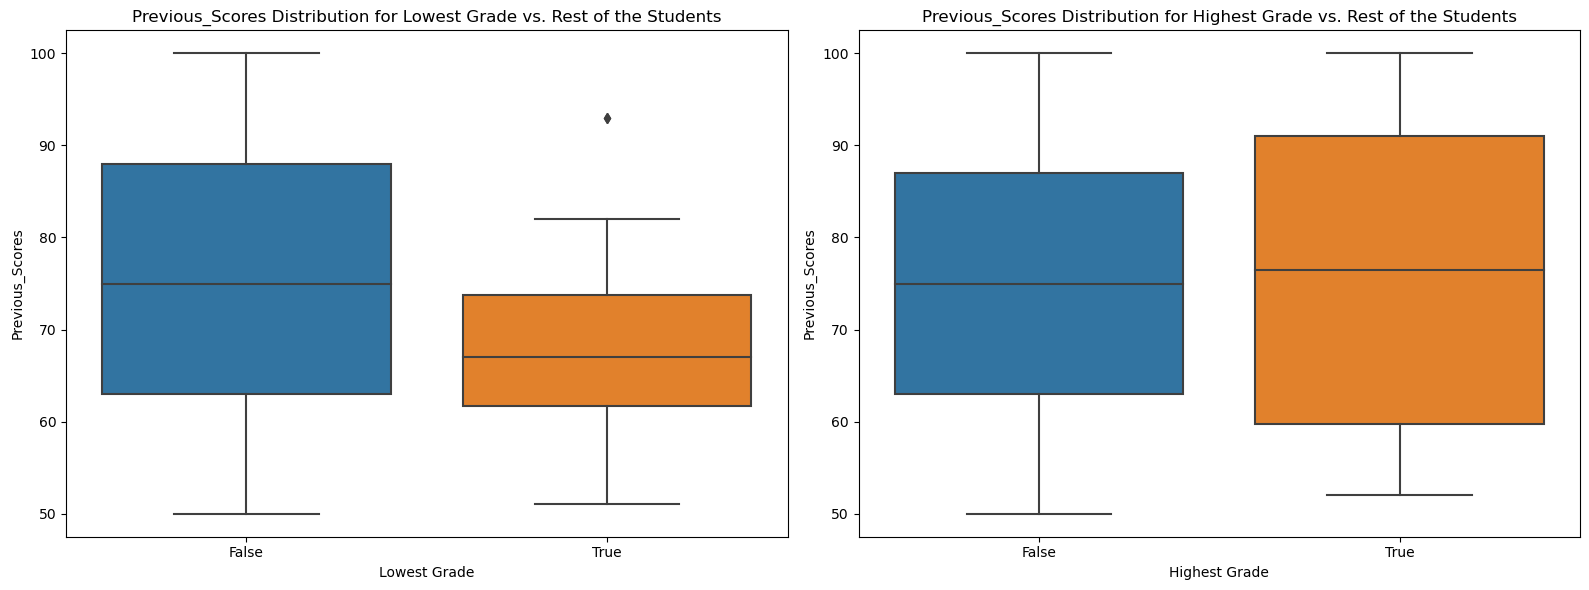

In [121]:
plt.figure(figsize=(16, 6))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for Lowest Grade vs. Rest of the Students
sns.boxplot(data=data, x='Lowest_Grade', y='Previous_Scores', ax=axes[0])
axes[0].set_title("Previous_Scores Distribution for Lowest Grade vs. Rest of the Students")
axes[0].set_xlabel("Lowest Grade")
axes[0].set_ylabel("Previous_Scores")

# Boxplot for Highest Grade vs. Rest of the Students
sns.boxplot(data=data, x='Highest_Grade', y='Previous_Scores', ax=axes[1])
axes[1].set_title("Previous_Scores Distribution for Highest Grade vs. Rest of the Students")
axes[1].set_xlabel("Highest Grade")
axes[1].set_ylabel("Previous_Scores")

plt.tight_layout()
plt.show()

From these side-by-side box plots, we can observe that previous exam results do not consistently predict future performance, especially for students who performed exceptionally well on this exam. While some consistency might be expected, the data shows that students in the highest-performing group often do not follow prior patterns.

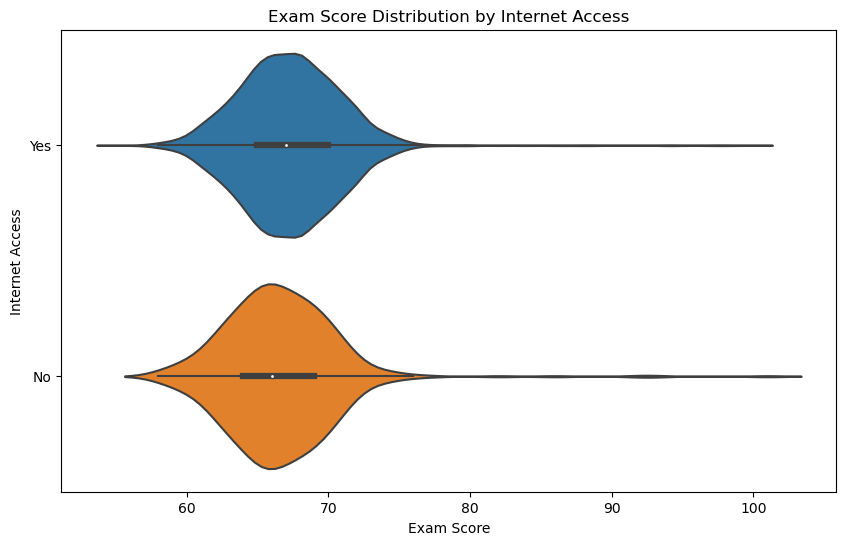

In [122]:
plt.figure(figsize=(10, 6))
sns.violinplot(y='Internet_Access', x='Exam_Score', data=data, split=True)
plt.title('Exam Score Distribution by Internet Access')
plt.xlabel('Exam Score')
plt.ylabel('Internet Access')
plt.show()

When I began exploring the data, I hypothesized that internet access might significantly impact exam scores. The reasoning seemed straightforward: students with consistent internet access would likely have more resources at their fingertips, access to online study materials, tutoring videos, and forums for homework help. In contrast, students without reliable internet might struggle to access the same breadth of information, leading to potentially lower scores.

I expected to see a clear pattern in the data showing higher exam scores among students with stable internet access. However, the results told a different story.

This unexpected outcome suggested that while internet access might be a helpful tool, it wasn’t the deciding factor in exam success for this sample. It seems other factors, like motivation, study habits, or even quality of offline resources, may play a more crucial role in driving exam performance.

High_motivation_quality_teachers_tutoring is a subset that includes only the students who meet specific criteria related to their tutoring, motivation, and teacher quality levels

In [123]:
High_motivatin_quality_teachers_tutoring = data[
    (data['Tutoring_Sessions'] >= 4) & 
    (data['Motivation_Level'].isin(["Medium", "High"])) & 
    (data['Teacher_Quality'].isin(["Medium", "High"]))
]

In [124]:
print("Count:", len(High_motivation_quality_teachers_tutoring))
print("Average Exam score:", High_motivation_quality_teachers_tutoring['Exam_Score'].mean())

Count: 263
Average Exam score: 68.95057034220532


I wanted to see if high motivation, quality teaching, or extra tutoring sessions would improve exam scores. I expected these factors to make a difference, but the results were disappointing. There wasn’t a clear link between these supports and higher scores, suggesting they might not be as impactful as expected.
So I have added some more hisplots to compare.


I created four different groups of students based on specific conditions, and then compared their exam score distributions.

First Group: Students with high motivation, quality teaching, and tutoring sessions.
Second Group: Students with low parental involvement, no extracurricular activities, and negative peer influence.
Third Group: Students with access to high resources, participation in extracurricular activities, and positive peer influence.
Overall Data: The entire dataset, showing the exam score distribution for all students combined.

In [161]:
Resourses_extra_activities_peerinfluence = data[
    (data['Extracurricular_Activities'] == "Yes") & 
    (data['Peer_Influence'] == "Positive") & 
    (data['Access_to_Resources'] == "High")
]

In [162]:
print("Count:", len(Resourses_extra_activities_peerinfluence))
print("Average Exam score:", Resourses_extra_activities_peerinfluence['Exam_Score'].mean())

Count: 495
Average Exam score: 68.7010101010101


In [156]:
Low_parental_involment_no_activities_negative_influence = data[
    (data['Parental_Involvement'] == "Low") & 
    (data['Peer_Influence'] == "Negative") & 
    (data['Extracurricular_Activities'] == "No")
]

In [163]:
print("Count:", len(Low_parental_involment_no_activities_negative_influence))
print("Average Exam score:", Low_parental_involment_no_activities_negative_influence['Exam_Score'].mean())

Count: 118
Average Exam score: 65.0


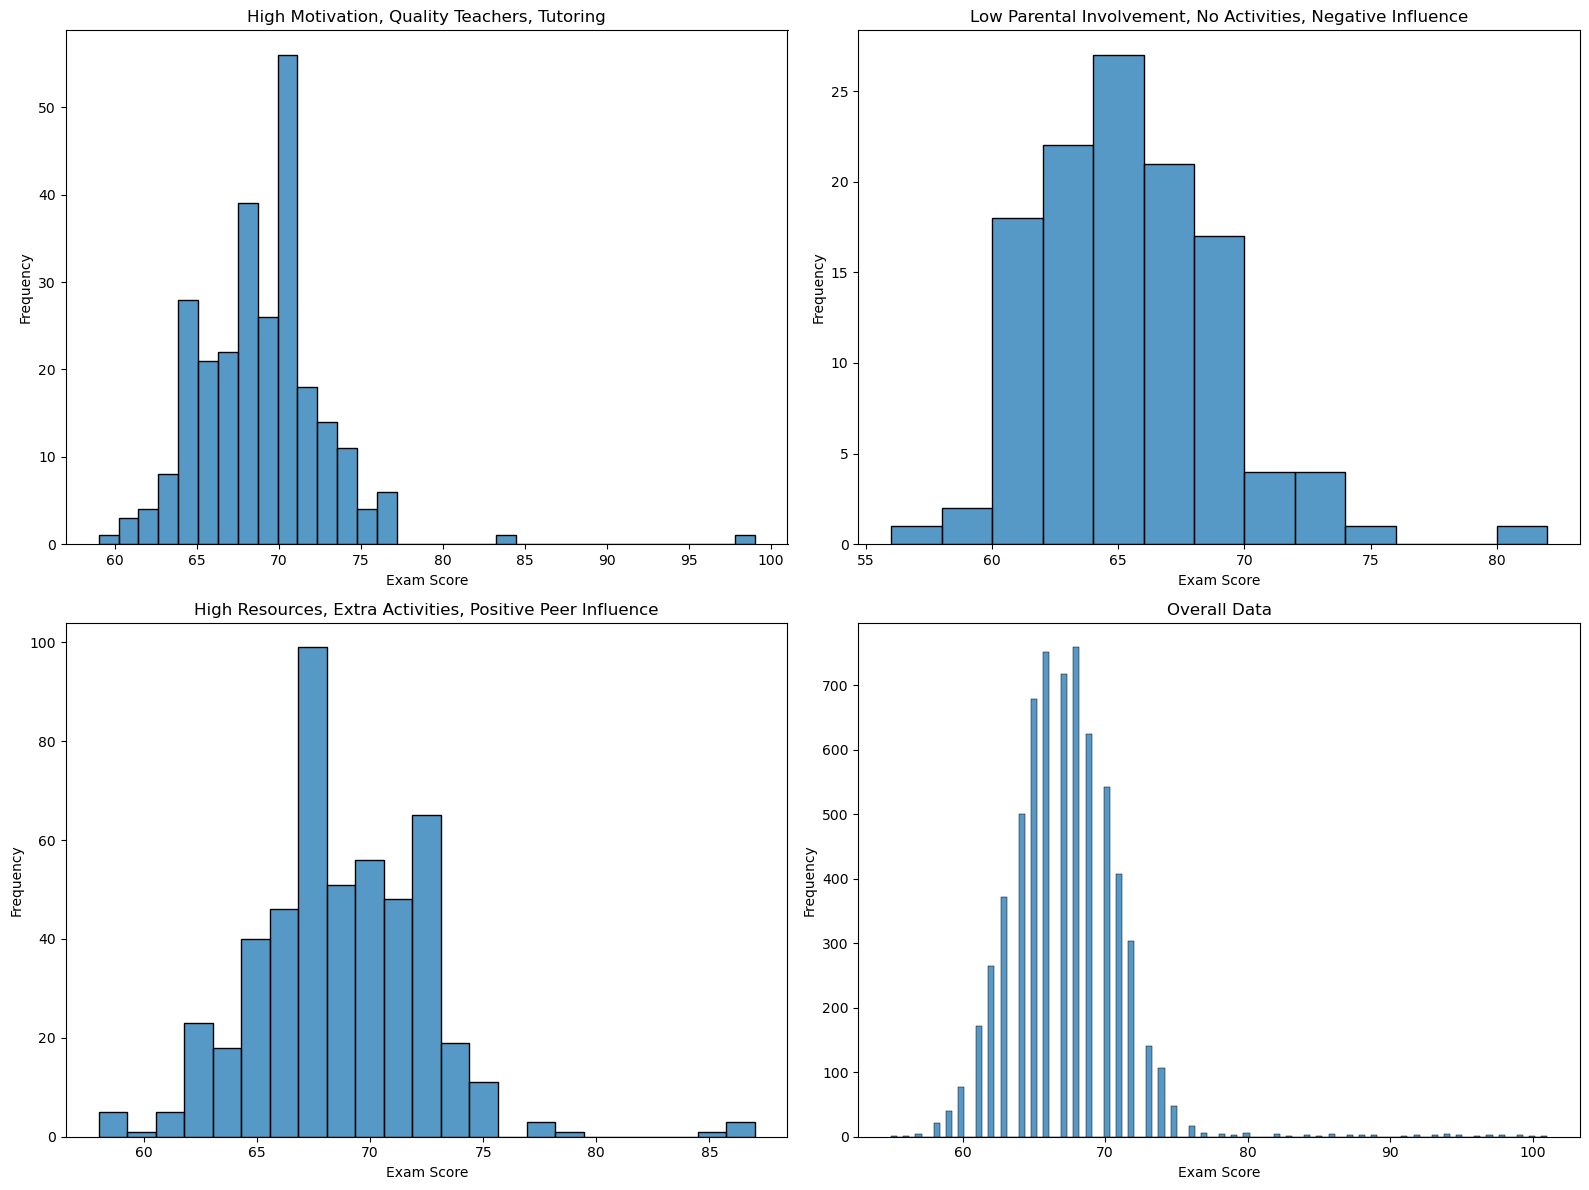

In [160]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(data=High_motivatin_quality_teachers_tutoring, x='Exam_Score', ax=axes[0, 0])
axes[0, 0].set_title("High Motivation, Quality Teachers, Tutoring")
axes[0, 0].set_xlabel("Exam Score")
axes[0, 0].set_ylabel("Frequency")

sns.histplot(data=Low_parental_involment_no_activities_negative_influence, x='Exam_Score', ax=axes[0, 1])
axes[0, 1].set_title("Low Parental Involvement, No Activities, Negative Influence")
axes[0, 1].set_xlabel("Exam Score")
axes[0, 1].set_ylabel("Frequency")

sns.histplot(data=Resourses_extra_activities_peerinfluence, x='Exam_Score', ax=axes[1, 0])
axes[1, 0].set_title("High Resources, Extra Activities, Positive Peer Influence")
axes[1, 0].set_xlabel("Exam Score")
axes[1, 0].set_ylabel("Frequency")

sns.histplot(data=data, x='Exam_Score', ax=axes[1, 1])
axes[1, 1].set_title("Overall Data")
axes[1, 1].set_xlabel("Exam Score")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


This comparison helps to show that:

Students with high support (like motivation, quality teaching, and tutoring) tend to score in the mid-to-high range.
Students with lower support (like low parental involvement and negative peer influence) are more likely to have lower scores.
Access to resources and positive influences appear to offer some academic advantage but do not lead to extremely high scores.

### Since there were only around 100 outliers, I decided to separate the entire dataset by score groups and investigate each group individually. This approach allows for a clearer comparison of patterns and differences within each group, helping to identify specific factors that may influence performance in the high, medium, and low score categories.:

Hight score >= 70

60 < Medium score > 70

Low score <=60

In [147]:
score_groups = []

for score in data['Exam_Score']:
    if score >= 70:
        score_groups.append('High')
    elif score > 60:
        score_groups.append('Medium')
    else:
        score_groups.append('Low')

data['Score_Group'] = score_groups

print(data['Score_Group'].value_counts())

Medium    4837
High      1625
Low        145
Name: Score_Group, dtype: int64


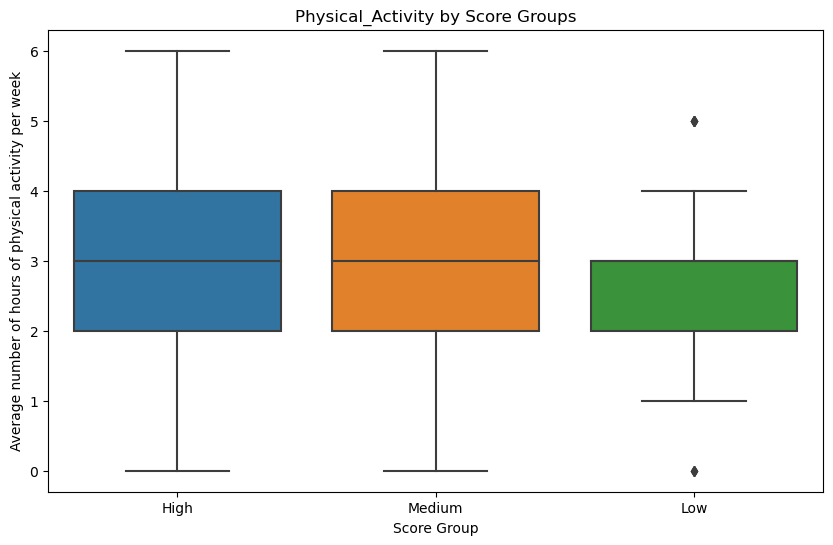

In [148]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Score_Group', y='Physical_Activity', order=['High', 'Medium', 'Low'])

plt.title("Physical_Activity by Score Groups")
plt.xlabel("Score Group")
plt.ylabel("Average number of hours of physical activity per week")
plt.show()

A wider range in the High and Medium score group might indicate greater variability in physical activity habits among this group of students.

While there’s a slight decrease in median physical activity from High to Low score groups, the difference isn’t significant. This might suggest that physical activity has a limited influence on exam performance in this dataset, as students across all score groups engage in similar amounts of physical activity on average.

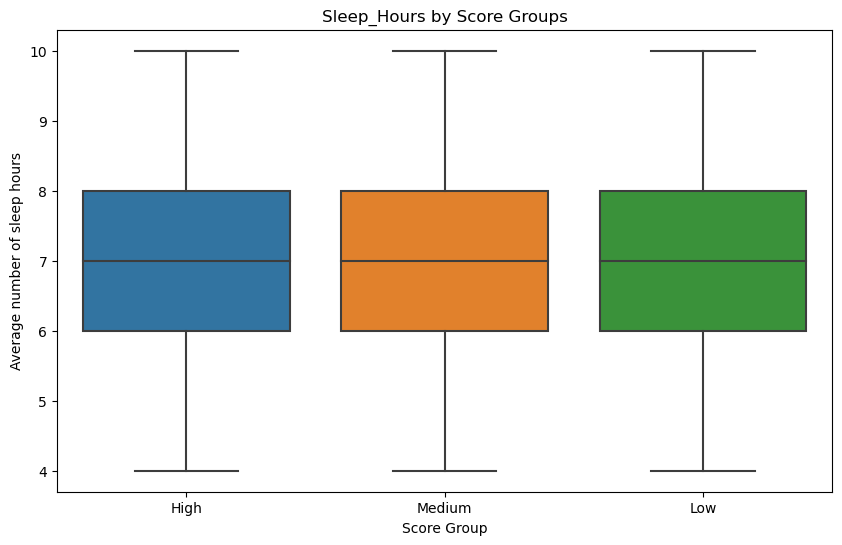

In [166]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Score_Group', y='Sleep_Hours', order=['High', 'Medium', 'Low'])

plt.title("Sleep_Hours by Score Groups")
plt.xlabel("Score Group")
plt.ylabel("Average number of sleep hours")
plt.show()

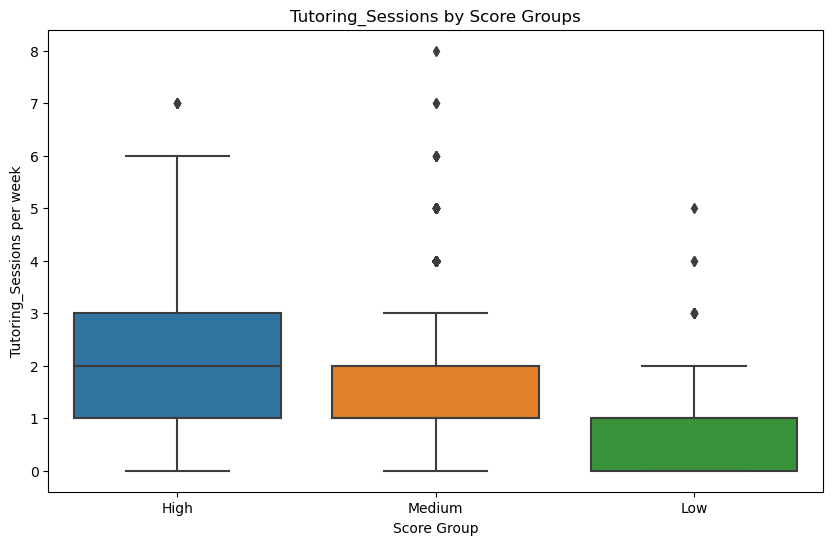

In [171]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Score_Group', y='Tutoring_Sessions', order=['High', 'Medium', 'Low'])

plt.title("Tutoring_Sessions by Score Groups")
plt.xlabel("Score Group")
plt.ylabel("Tutoring_Sessions per month")
plt.show()

In [170]:
data 

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Score_Group
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,Medium
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,Medium
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,High
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,High
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,...,Medium,Public,Positive,2,No,High School,Near,Female,68,Medium
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,...,High,Public,Positive,2,No,High School,Near,Female,69,Medium
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,...,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68,Medium
6605,10,86,High,High,Yes,6,91,High,Yes,2,...,Medium,Private,Positive,3,No,High School,Far,Female,68,Medium


### I explored various factors that might influence students exam performance. By segmenting the data into different groups and using visualizations.

**Physical Activity and Exam Scores:**

Observed that the average hours of physical activity were fairly consistent across high, medium, and low score groups, with only slight differences. This suggests that physical activity levels do not have a strong influence on academic performance in this dataset.

**Impact of Motivation, Teacher Quality, and Tutoring:**

A subset of students with high motivation, quality teaching, and frequent tutoring sessions showed a tendency to achieve mid-to-high exam scores. This indicates that these support factors may help students maintain consistent academic performance, though they do not necessarily lead to top scores.


**Effect of Low Parental Involvement and Negative Peer Influence:**

Students with low parental involvement, no extracurricular activities, and negative peer influence mostly scored in the lower range (55-65). This pattern suggests that lack of support from family and peers could be associated with poorer academic outcomes.

**Positive Influence of Resources and Extracurricular Activities:**

Students with access to resources, participation in extracurricular activities, and positive peer influence showed slightly better score distributions than those without these advantages. However, their scores remained mostly in the mid-range, indicating some benefit but not a strong push toward higher performance.

**Overall Score Distribution:**

The entire dataset showed a bell-shaped distribution of exam scores, centered around 65-70. This suggests that most students have average scores, with only a few students achieving extremely high or low results.


## <span style="color: green;">Conclucion</span>
 
The EDA reveals that while support factors like motivation, quality teaching, resources, and positive peer influence may contribute to better academic performance, their impact is generally moderate. Conversely, low parental involvement and negative peer influence appear to correlate with lower exam scores. This analysis highlights the importance of support systems but also suggests that no single factor overwhelmingly influences performance, as most students tend to cluster in the average score range.